<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Lachno-abund" data-toc-modified-id="Lachno-abund-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Lachno abund</a></span></li><li><span><a href="#anx-taxa" data-toc-modified-id="anx-taxa-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>anx taxa</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* plotting lachnospiraceae abundances for curatedMG dataset

# Var

In [30]:
data_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/combined_GTDBr86/profiles/kraken/'
brk_file = file.path(data_dir, 'all-combined-bracken.tsv')
meta_file = file.path(data_dir, 'Global_metagenomes_Metadata.csv')
#data_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/metadata/'
#meta_file = file.path(data_dir, 'Global_metagenomes_Metadata.csv')

# Init

In [31]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [32]:
df.dims()
setDTthreads(4)

# Load

In [100]:
# bracken abundances
brk = read_bracken(brk_file)
brk

name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Pedobacter sp. AJM,2003629,S,Bacteria,Bacteroidetes,Sphingobacteriia,Sphingobacteriales,Sphingobacteriaceae,Pedobacter,Pedobacter sp. AJM,SAMEA5814677,0
Bradyrhizobium sp. Ghvi,1855319,S,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,Bradyrhizobium,Bradyrhizobium sp. Ghvi,SAMEA5814677,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Methylovulum miyakonense,645578,S,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylovulum,Methylovulum miyakonense,VTS_SS_9_1_18,0
Nitritalea halalkaliphila,590849,S,Bacteria,Bacteroidetes,Cytophagia,Cytophagales,Cyclobacteriaceae,Nitritalea,Nitritalea halalkaliphila,VTS_SS_9_1_18,0


In [101]:
# sample metadata
meta = Fread(meta_file) %>%
    mutate.(Sample = gsub('[+-]+', '.', Sample)) %>%
    filter.(!is.na(non_westernized)) %>%
    mutate.(westernized = non_westernized == 'no') %>%
    select.(-non_westernized)
meta

dataset_name,Sample,subjectID,disease,age,gender,country,BMI,alcohol,disease_subtype,⋯,systolic_p,creatine,albumine,bilubirin,smoker,ever_smoker,birth_control_pil,c_peptide,insulin_cat,westernized
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
AsnicarF_2017,MV_FEM1_t1Q14,MV_FEM1,healthy,NA,female,ITA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
AsnicarF_2017,MV_FEM2_t1Q14,MV_FEM2,healthy,NA,female,ITA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,PNP_Validation_45,healthy,NA,NA,ISR,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE
ZeeviD_2015,PNP_Validation_46,PNP_Validation_46,healthy,NA,NA,ISR,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,TRUE


# Summary

In [102]:
# sample overlap
overlap(brk$Sample, meta$Sample)

intersect(x,y): 3469 
setdiff(x,y): 2494 
setdiff(y,x): 0 
union(x,y): 5963 


In [103]:
# joining abundances and metadata
brk %>% unique_n('samples', Sample)
brk = brk %>%
    inner_join.(meta %>% 
                    filter.(disease == 'healthy') %>%
                    select.(dataset_name, Sample, westernized, country),
                c('Sample')) 
brk %>% unique_n('samples', Sample)

No. of unique samples: 5963 
No. of unique samples: 2108 


### Lachno abund

In [104]:
# summarize by lachno
brk_s = brk %>%
    mutate.(taxonomy = ifelse(Family == 'Lachnospiraceae', Family, 'Other')) %>%
    summarize.(Abundance = sum(Abundance),
               .by=c(Sample, dataset_name, westernized, taxonomy, country))
brk_s

Sample,dataset_name,westernized,taxonomy,country,Abundance
<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>
MV_FEM1_t1Q14,AsnicarF_2017,TRUE,Other,ITA,0.96181
MV_FEM1_t1Q14,AsnicarF_2017,TRUE,Lachnospiraceae,ITA,0.03802
⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_46,ZeeviD_2015,TRUE,Other,ISR,0.95741
PNP_Validation_46,ZeeviD_2015,TRUE,Lachnospiraceae,ISR,0.04293


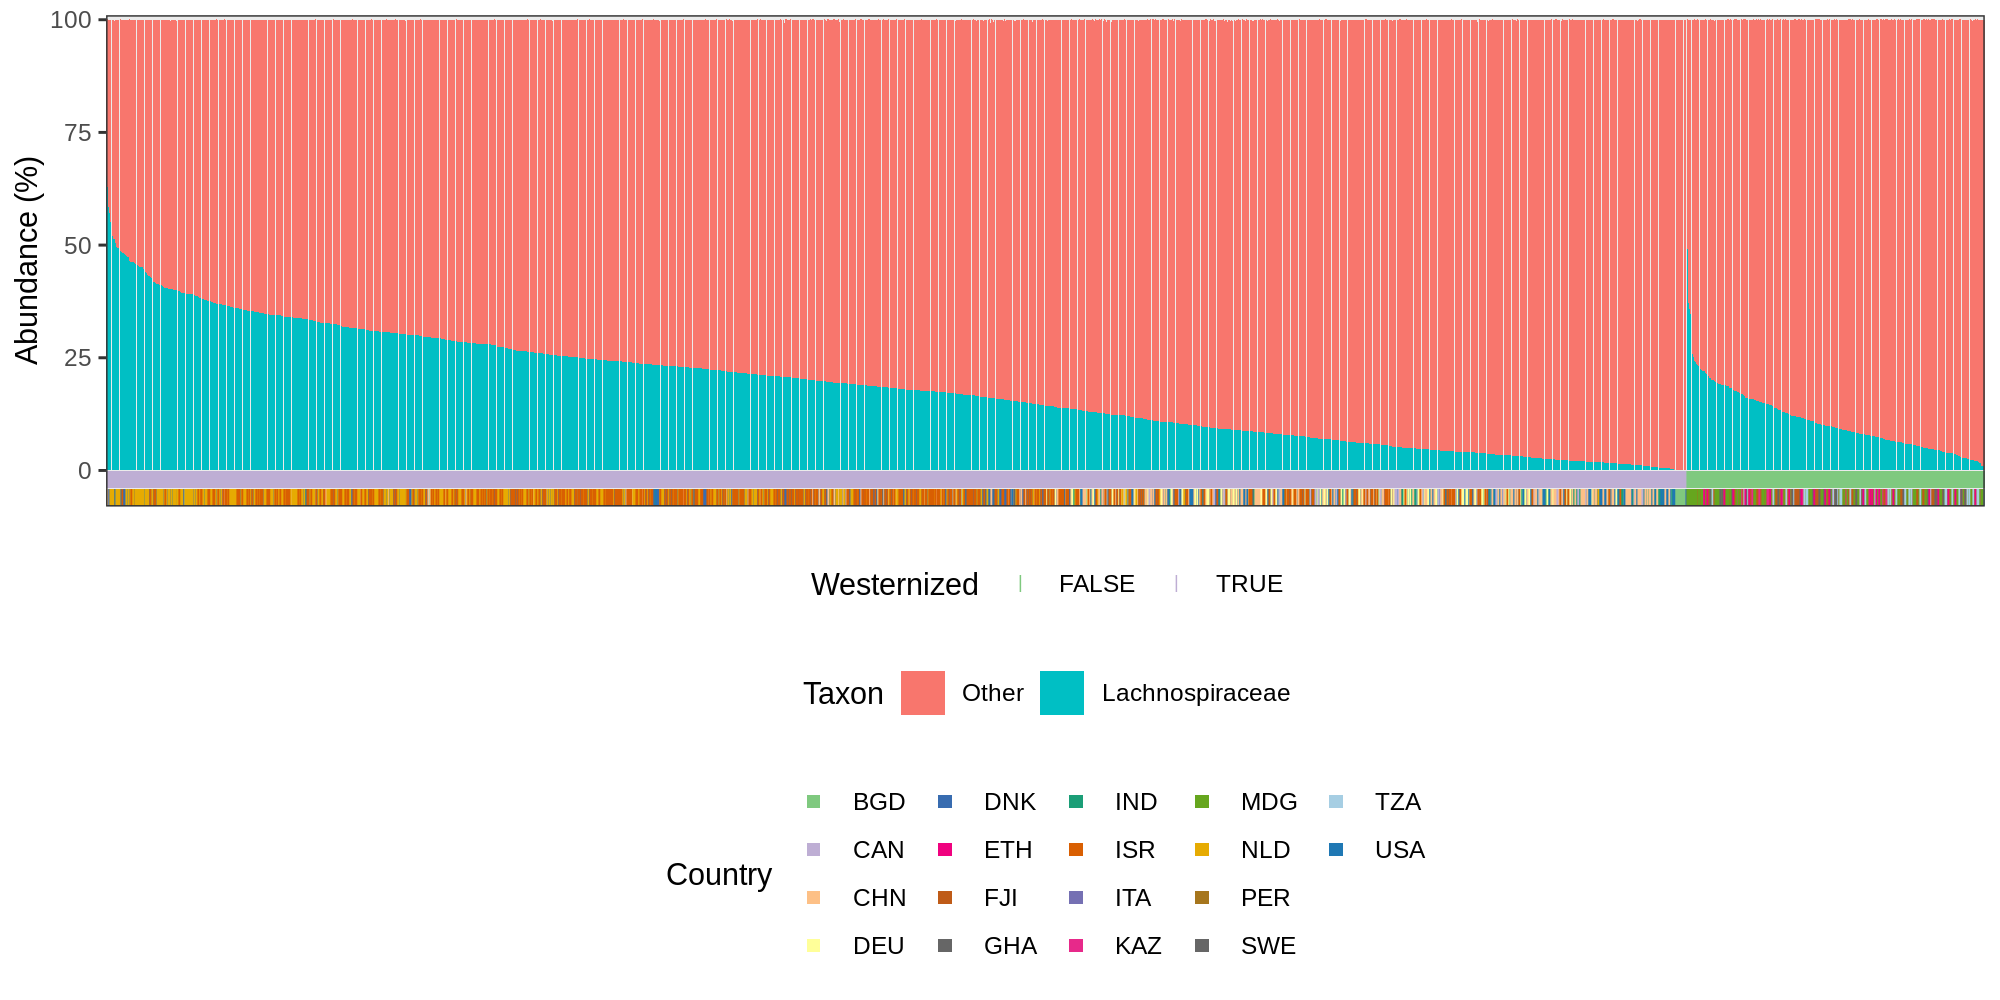

In [174]:
# plotting
X = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    select.(Sample, dataset_name, Abundance)

brk_sf = brk_s %>%
    inner_join.(X, c('Sample', 'dataset_name')) %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(X = -(westernized %>% as.factor %>% as.numeric) + 
                 -i.Abundance) %>%
    mutate.(Sample = reorder(Sample, X)) %>%
    rename.('Westernized' = westernized) %>%
    mutate.(taxonomy = factor(taxonomy, levels=c('Other', 'Lachnospiraceae')))

p = brk_sf %>%
    ggplot(aes(Sample, Abundance)) +
    geom_bar(stat='identity', aes(fill=taxonomy)) +
    geom_point(aes(y=-2, color=Westernized), shape='|', size=2) +
    scale_color_all('Westernized') +
    guides(color = guide_legend(override.aes = list(shape = 15))) +
    ggnewscale::new_scale_colour() +
    geom_point(aes(y=-6, color=country), shape='|', size=2) +
    scale_color_all('Country') +
    guides(color = guide_legend(override.aes = list(shape = 15))) +
    scale_y_continuous(expand=c(0,0), limits=c(-8,101)) +
    scale_fill_discrete('Taxon') +
    labs(y='Abundance (%)') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position='bottom',
        legend.box = 'vertical'
    ) 
p.dims(10,5)
plot(p)

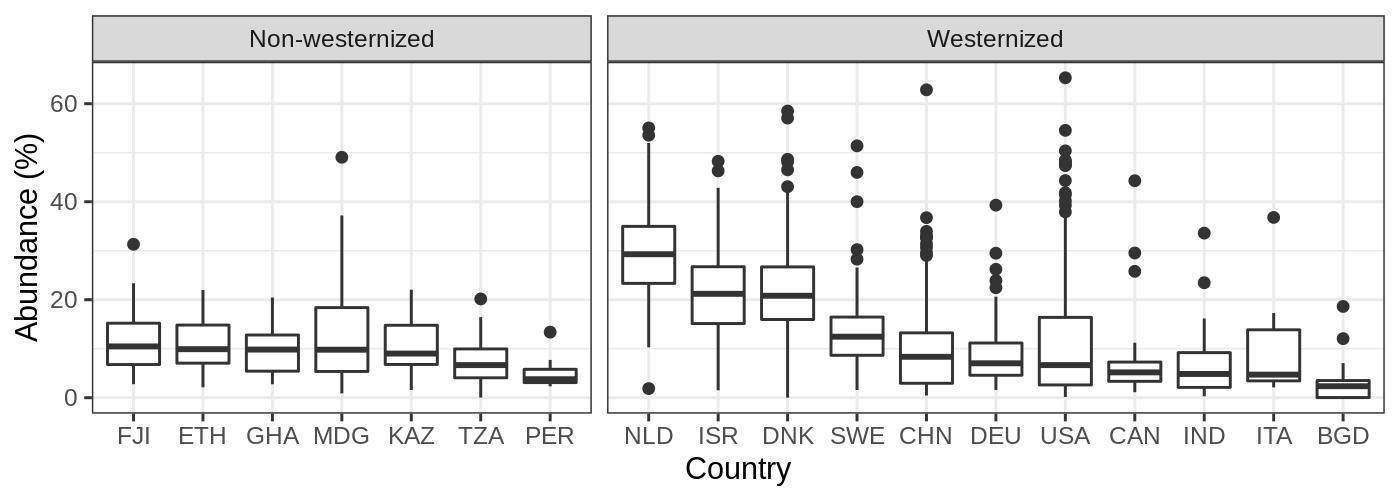

In [171]:
# boxplots
p = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(westernized = ifelse(westernized == TRUE, 'Westernized', 'Non-westernized')) %>%
    mutate.(median_abund = median(Abundance, na.rm=TRUE),
            .by=c(country)) %>%
    mutate.(country = reorder(country, -median_abund)) %>%
    ggplot(aes(country, Abundance)) +
    geom_boxplot() +
    facet_grid(. ~ westernized, scales='free_x', space='free_x') +
    labs(x='Country', y='Abundance (%)') +
    theme_bw()
p.dims(7,2.5)
plot(p)

### anx taxa

In [178]:
# summarize by lachno
to_keep = c('Oscillospiraceae', 'Lachnospiraceae')
brk_s = brk %>%
    mutate.(taxonomy = ifelse(Family %in% to_keep, Family, 'Other')) %>%
    summarize.(Abundance = sum(Abundance),
               .by=c(Sample, dataset_name, westernized, taxonomy, country))
brk_s$taxonomy %>% table
brk_s

.
 Lachnospiraceae Oscillospiraceae            Other 
            2108             2108             2108 

Sample,dataset_name,westernized,taxonomy,country,Abundance
<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>
MV_FEM1_t1Q14,AsnicarF_2017,TRUE,Other,ITA,0.95405
MV_FEM1_t1Q14,AsnicarF_2017,TRUE,Lachnospiraceae,ITA,0.03802
⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_46,ZeeviD_2015,TRUE,Lachnospiraceae,ISR,0.04293
PNP_Validation_46,ZeeviD_2015,TRUE,Oscillospiraceae,ISR,0.00422


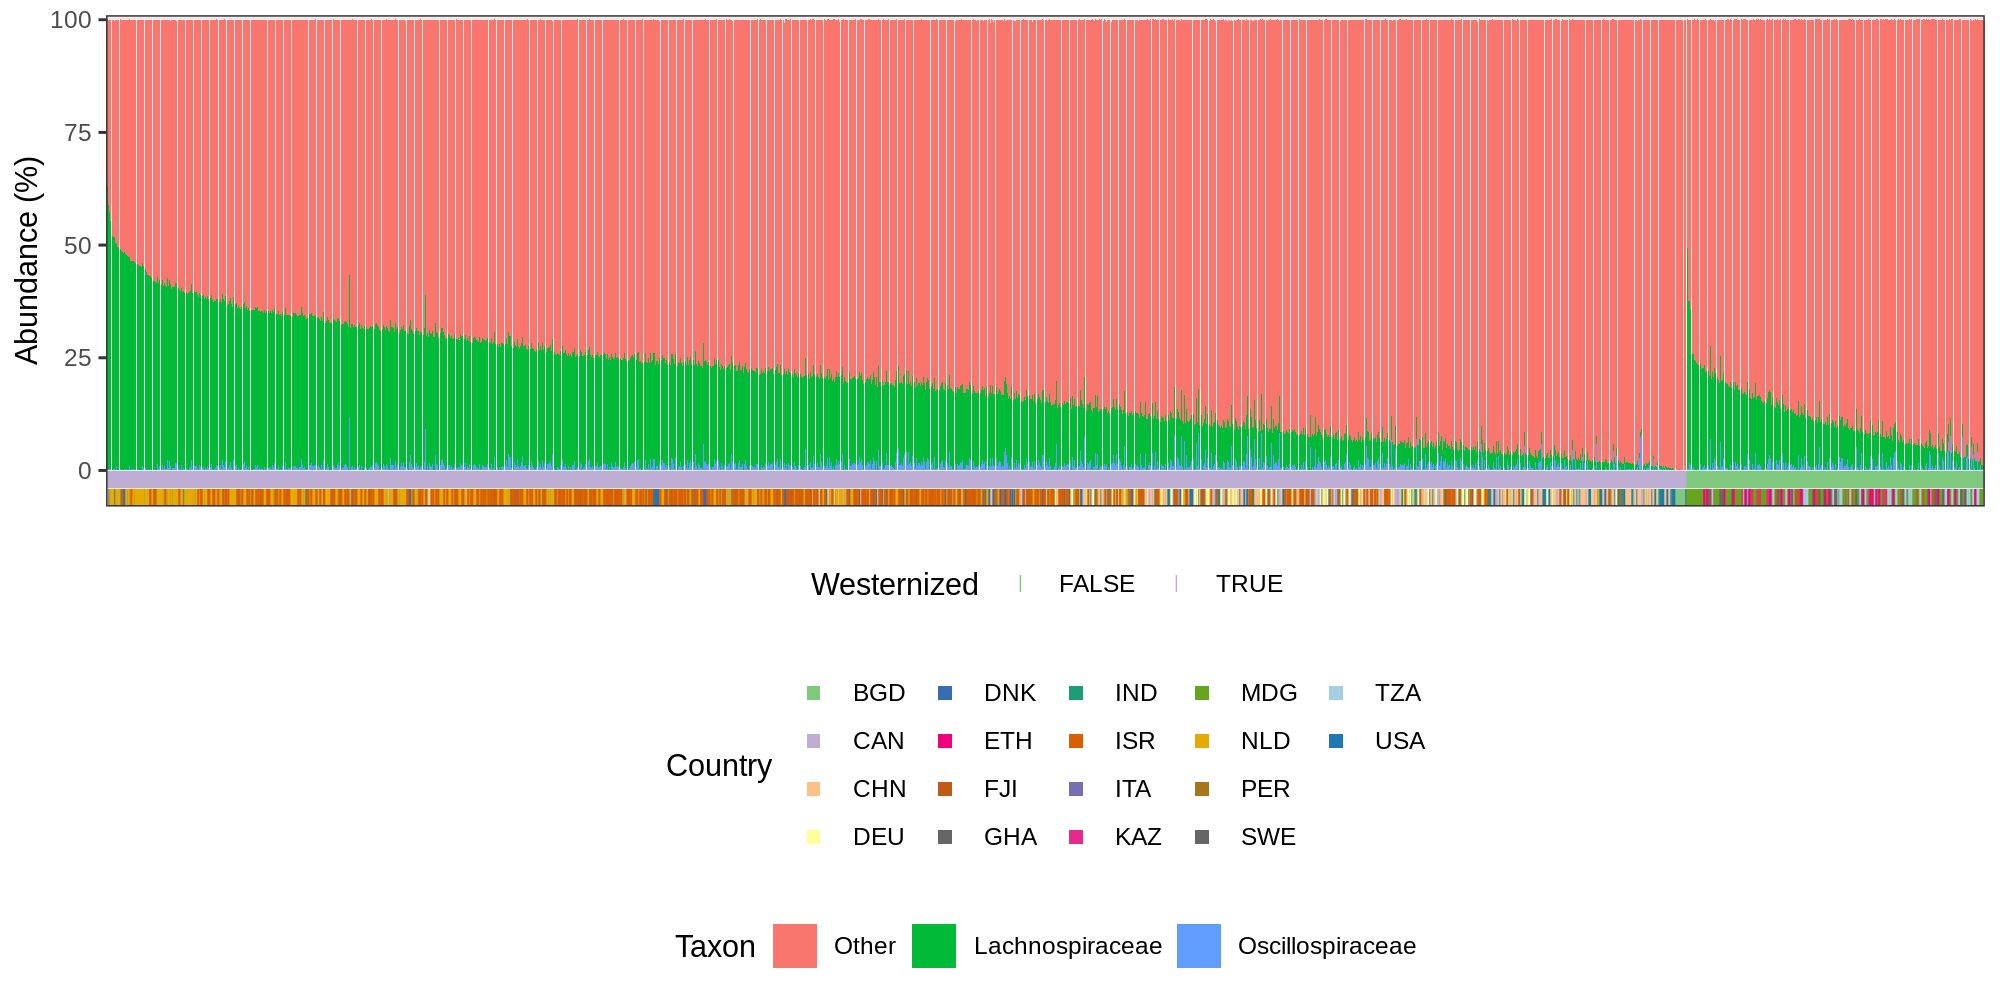

In [184]:
# plotting
X = brk_s %>%
    filter.(taxonomy == 'Lachnospiraceae') %>%
    select.(Sample, dataset_name, Abundance)

brk_sf = brk_s %>%
    inner_join.(X, c('Sample', 'dataset_name')) %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(X = -(westernized %>% as.factor %>% as.numeric) + 
                 -i.Abundance) %>%
    mutate.(Sample = reorder(Sample, X)) %>%
    rename.('Westernized' = westernized) %>%
    mutate.(taxonomy = factor(taxonomy, 
                              levels=c('Other', 
                                       'Lachnospiraceae', 
                                       'Oscillospiraceae')))

p = brk_sf %>%
    ggplot(aes(Sample, Abundance)) +
    geom_bar(stat='identity', aes(fill=taxonomy)) +
    geom_point(aes(y=-2, color=Westernized), shape='|', size=2) +
    scale_color_all('Westernized') +
    guides(color = guide_legend(override.aes = list(shape = 15))) +
    ggnewscale::new_scale_colour() +
    geom_point(aes(y=-6, color=country), shape='|', size=2) +
    scale_color_all('Country') +
    guides(color = guide_legend(override.aes = list(shape = 15))) +
    scale_y_continuous(expand=c(0,0), limits=c(-8,101)) +
    scale_fill_discrete('Taxon') +
    labs(y='Abundance (%)') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        legend.position='bottom',
        legend.box = 'vertical'
    ) 
p.dims(10,5)
plot(p)

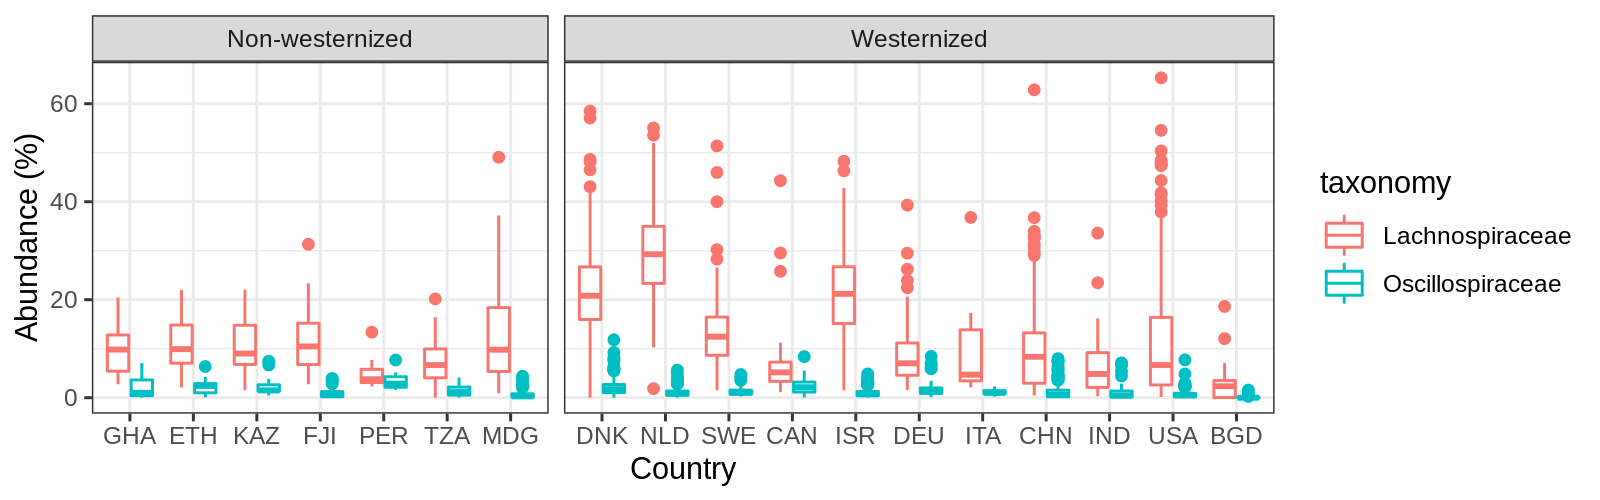

In [186]:
# boxplots
p = brk_s %>%
    filter.(taxonomy %in% to_keep) %>%
    mutate.(Abundance = Abundance * 100) %>%
    mutate.(westernized = ifelse(westernized == TRUE, 'Westernized', 'Non-westernized')) %>%
    mutate.(median_abund = median(Abundance, na.rm=TRUE),
            .by=c(country)) %>%
    mutate.(country = reorder(country, -median_abund)) %>%
    ggplot(aes(country, Abundance, color=taxonomy)) +
    geom_boxplot() +
    facet_grid(. ~ westernized, scales='free_x', space='free_x') +
    labs(x='Country', y='Abundance (%)') +
    theme_bw()
p.dims(8,2.5)
plot(p)

# sessionInfo

In [147]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/envs/tidyverse-ecoPhy3/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.9 tidytable_0.6.3   data.table_1.14.0 ggplot2_3.3.5    
[5] tidyr_1.1.3       dplyr_1.0.7      

loaded via a namespace (and not attached):
 [1] RColorBrewer_1.1-2 pillar_1.6.1       compiler_4.1.0     base64enc_0.1-3   
 [5] tools_4.1.0        digest